>* ***信息论背后的思想***：一件不太可能的事件比一件比较可能的事件更有信息量

>* ***信息***（*information*）：  
>三大条件：  
>⽐较可能发⽣的事件的信息量要少。  
>⽐较不可能发⽣的事件的信息量要⼤。  
>独⽴发⽣的事件之间的信息量应该是可以叠加的。例如，投掷的硬币两次正⾯朝上传递的信息量，应该是投掷⼀次硬币正⾯朝上的信息量的两倍。

>* ***自信息***（*self-information*）：对于事件$\mathrm{x}=x$，定义：  
>$$I(x) = -\log P(x)$$
>自信息满足上述三个条件，单位为奈特（nats）

>* ***香农熵***（*Shannon entropy*）：上述的自信息只包含了一个事件的信息，而对于整个概率分布$P$，不确定性的衡量可以表示为：
>$$H(P)=\mathbb{E}_{x\sim P}[\mathrm{I}\left(x\right)]=-\mathbb{E}_{\sim P}[\log P\left(x\right)]$$
>香农熵是编码原理中的最优编码长度

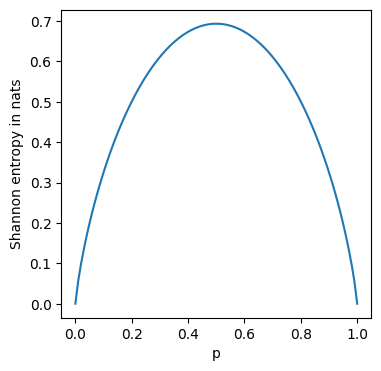

In [1]:
import numpy as np
import matplotlib.pyplot as plt

p = np.linspace(1e-6, 1-1e-6, 100)
entropy = (p-1)*np.log(1-p) - p*np.log(p)

plt.figure(figsize=(4, 4))
plt.plot(p, entropy)
plt.xlabel('p')
plt.ylabel('Shannon entropy in nats')
plt.show()


In [6]:
import math

def H(sentence):
    """最优编码距离"""
    entropy = 0
    # 这里有256个可能的ASCII符号
    for character_i in range(256):
        Px = sentence.count(chr(character_i)) / len(sentence)
        if Px > 0:
            entropy += -Px * math.log(Px, 2)
    return entropy

import random

simple_message = "".join([chr(random.randint(0, 64)) for i in range(500)])
print(simple_message)
H(simple_message)

<##")%9"("-2$-<57!;62 7>9)'@63#
;	4"!9'3< +--?!.":&@-628((/&	(20((
1	,'@3*#(>;37
3//#5,	(4'!369.*
+";'&&	< 6+; !401<36@( !4: #/)<%4@@#	$*2
(%.?0?


5.900749465510934

>* ***联合熵***（*joint entropy*）：考虑联合分布概率的熵
>$$H(X,Y)=-\sum_{x,y}P(x,y)\log\left(P(x,y)\right)$$

>* ***条件熵***（*conditional entropy*）：某件事情已经发生的情况下，另外一件事情的熵
>$$H(X|Y)=-\sum_y P(y)\sum_x P(x|y)\log\left(P(x|y)\right)$$

>* ***互信息***（*mutual information*）：表示两个事件的信息相交的部分
>$$I(X,Y)=H(X)+H(Y)\mathrm{-}H(X,Y)$$

>* ***信息变差***（*variation of information*）：表示两个时间的信息不相交的部分
>$$V(X,Y)=H(X,Y)\mathrm{-}I(X,Y)$$

>* ***$KL$散度***（*Kullback-Leibler Divergence*）：衡量两个分布之间的差距：
>$$\operatorname{D}_{\mathrm{KL}}(P||Q)=\mathbb{E}_{x\sim P}[\log\dfrac{P(x)}{Q(x)}]=\mathbb{E}_{x\sim P}[\log P(x)-\log Q(x)]$$
>注意$\mathrm{D}_{\mathrm{KL}}(\mathrm{P}||\mathrm{Q})\neq\mathrm{D}_{{\mathrm{KL}}}(\mathrm{Q}||\mathrm{P})$，不满足对称性

>* ***交叉熵***（*cross entropy*）：最小化交叉熵可使得两模型公布更接近
>$$H(P,Q)=H(P)+\operatorname{D}_{\mathrm{KL}}(P||Q)=-\mathbb{E}_{x\sim P}[\log Q(x)]$$

In [7]:
# KL定义
from scipy.stats import entropy # 内置KL
def kl(p, q):
    p = np.asarray(p, dtype=float)
    q = np.asarray(q, dtype=float)
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

p = [0.1, 0.9]
q = [0.1, 0.9]

print(entropy(p, q) == kl(p, q))

True
